In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or press

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

In [64]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [65]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [66]:
cat=['Normal','vitiligo']

In [67]:
import pandas as pd
import os
def data_dictionary():
    path_train=r"C:\Users\teknoloji5\Downloads\skin\skin\train/"
    #list_train=os.listdir(path_train)
    cat=['Normal','vitiligo']
   #cat=['Normal','Melanoma Skin Cancer Nevi and Moles']
    #cat=['Normal','Eczema Photos']
    #cat=['Normal','Tinea Ringworm Candidiasis and other Fungal Infections']
    #cat=['Normal','Acne and Rosacea Photos']
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in cat:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [68]:
train=data_dictionary()

In [69]:
import cv2
images=[]
label=[]
for i in train['image_path']:

    img=cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    #img=resize_and_rescale(img)
    images.append(img)

In [70]:
label=train['target']

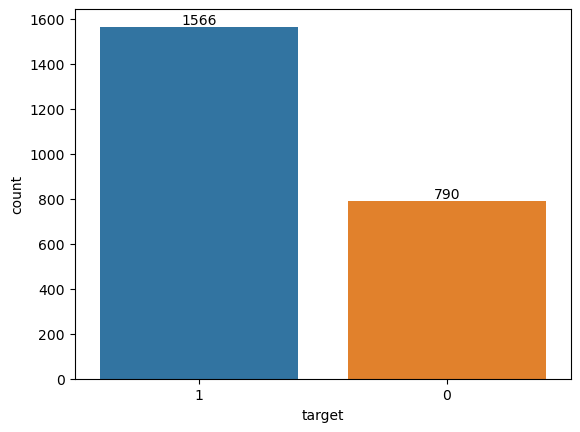

In [71]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

ax = sns.countplot(x=train['target'],
                   order=train['target'].value_counts(ascending=False).index);

abs_values = train['target'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [72]:
len(label)

2356

In [73]:
len(images)

2356

In [74]:
import numpy as np
import pandas as pd

In [75]:
data=np.array(images)

In [76]:
label=np.array(label)

In [77]:
data.shape

(2356, 224, 224, 3)

In [78]:
label.shape

(2356,)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2,random_state=4)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)

In [80]:
X_train.shape

(1507, 224, 224, 3)

In [81]:
X_test.shape

(472, 224, 224, 3)

In [82]:
y_test.shape

(472,)

In [83]:
import keras
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)

In [84]:
y_validation=keras.utils.to_categorical(y_validation, num_classes)

In [85]:
y_test=keras.utils.to_categorical(y_test, num_classes)

In [86]:
y_test.shape

(472, 2)

In [87]:
y_train.shape

(1507, 2)

In [88]:
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [89]:
base_model = VGG16(weights='imagenet', include_top=True,input_shape=(224, 224, 3))
x = base_model.output
predictions = Dense(2,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Add a global average pooling layer to reduce the spatial dimensions of the features
'''
x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)
x = base_model.output

# Add the final classification layer with the number of classes in your dataset

# Create the model with the base VGG19 model as input and the new classification layers on top
model = Model(inputs=base_model.input, outputs=predictions)


'''


553467096/553467096 [==============================] - 20s 0us/step


"\nx = GlobalAveragePooling2D()(x)\n# Add a fully connected layer with 256 units and ReLU activation\nx = Dense(256, activation='relu')(x)\nx = base_model.output\n\n# Add the final classification layer with the number of classes in your dataset\n\n# Create the model with the base VGG19 model as input and the new classification layers on top\nmodel = Model(inputs=base_model.input, outputs=predictions)\n\n\n"

In [90]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [91]:
#model = Sequential()
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(220,220,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(6, activation='sigmoid'))

In [92]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_validation,y_validation),batch_size=32,verbose=1) 

Epoch 1/10
48/48 [==============================] - 932s 19s/step - loss: 0.6684 - accuracy: 0.6596 - val_loss: 0.6551 - val_accuracy: 0.6790
Epoch 2/10
37/48 [======================>.......] - ETA: 3:21 - loss: 0.6542 - accuracy: 0.6639

In [ ]:
_, acc = base_model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred=base_model.predict(X_test)

In [ ]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
y_test

In [ ]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection vitiligo vs normal using VGG16 ")
plt.xticks(range(2), ['normal', 'Vitiligo'], fontsize=16)
plt.yticks(range(2), ['normal', 'Vitiligo'], fontsize=16)
ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

In [ ]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [ ]:
confusion_matrix=classification_report(y_test,y_pred2)

In [ ]:
print(confusion_matrix)